In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st

# Importing Google maps API key
# from api_keys import g_key

mel_subs_path = "Data files/Victoria property sales report.csv"
mel_subs_df = pd.read_csv(mel_subs_path)

In [74]:
mel_subs_df

,Median House Prices 3rd Quarter 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Change %,Change %.1,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOORAK,4750000,5000000,4500000,5550000,5750000,16,45,21.1,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000,23,120,10.6,17.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000,5,9,17.5,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000,2,15,68.6,82.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Start by making the columns = the 2nd row in the dataset i.e. row index 0.
# This results in two rows of "headings"
mel_subs_df.columns = mel_subs_df.iloc[0]
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOORAK,4750000,5000000,4500000,5550000,5750000,16,45,21.1,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000,23,120,10.6,17.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000,5,9,17.5,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000,2,15,68.6,82.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Next want to drop the 2nd row because we don't want it anymore.
mel_subs_df = mel_subs_df.drop(mel_subs_df.index[0])

In [77]:
mel_subs_df = mel_subs_df.loc[:, mel_subs_df.columns.notnull()]
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000,16,45,21.1,3.6
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000,23,120,10.6,17.7
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000,5,9,17.5,8.1
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000,2,15,68.6,82.5
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000,11,44,16.3,18.4
...,...,...,...,...,...,...,...,...,...,...
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
mel_subs_df = mel_subs_df.dropna(axis=0, how='all')
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000,16,45,21.1,3.6
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000,23,120,10.6,17.7
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000,5,9,17.5,8.1
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000,2,15,68.6,82.5
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000,11,44,16.3,18.4
...,...,...,...,...,...,...,...,...,...,...
758,KANIVA,119800,177000,137500,96000,99000,5,13,-17.3,3.1
759,RAINBOW,85000,67000,77500,60000,73500,4,13,-13.5,22.5
760,MINYIP,64500,140000,95000,65300,67500,6,14,4.7,3.4
761,RUPANYUP,159000,85000,140000,140000,65000,1,6,-59.1,NaN


In [79]:
mel_subs_df = mel_subs_df.dropna(subset=["SUBURB"])
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19,Apr - Jun 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000,16,45,21.1,3.6
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000,23,120,10.6,17.7
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000,5,9,17.5,8.1
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000,2,15,68.6,82.5
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000,11,44,16.3,18.4
...,...,...,...,...,...,...,...,...,...,...
757,OUYEN,112300,75000,143800,70500,100000,11,23,-10.9,41.8
758,KANIVA,119800,177000,137500,96000,99000,5,13,-17.3,3.1
759,RAINBOW,85000,67000,77500,60000,73500,4,13,-13.5,22.5
760,MINYIP,64500,140000,95000,65300,67500,6,14,4.7,3.4


In [80]:
mel_subs_df = mel_subs_df.iloc[:, 0:6]
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000
...,...,...,...,...,...,...
757,OUYEN,112300,75000,143800,70500,100000
758,KANIVA,119800,177000,137500,96000,99000
759,RAINBOW,85000,67000,77500,60000,73500
760,MINYIP,64500,140000,95000,65300,67500


In [81]:
mel_subs_df = mel_subs_df.rename(columns={"Apr- Jun 20": "Apr - Jun 20"})
mel_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000
...,...,...,...,...,...,...
757,OUYEN,112300,75000,143800,70500,100000
758,KANIVA,119800,177000,137500,96000,99000
759,RAINBOW,85000,67000,77500,60000,73500
760,MINYIP,64500,140000,95000,65300,67500


In [82]:
mel_subs_df.count()

0
SUBURB          761
Jul - Sep 19    761
Oct - Dec 19    761
Jan - Mar 20    761
Apr - Jun 20    761
Jul - Sep 20    761
dtype: int64

In [83]:
missing_data = mel_subs_df.loc[mel_subs_df["Jul - Sep 19"] == "-"]
missing_data

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20
518,DUNNSTOWN,-,607500,549900,390000,485000


In [84]:
clean_subs_df = mel_subs_df.drop(missing_data.index)
clean_subs_df

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20
1,TOORAK,4750000,5000000,4500000,5550000,5750000
2,BRIGHTON,3005000,2707500,2964400,2825000,3325000
3,DEEPDENE,2680000,2880000,5475000,2915000,3150000
4,IVANHOE EAST,1853800,2044000,2145000,1712500,3125000
5,HAWTHORN EAST,2412500,2250000,2177500,2370000,2806000
...,...,...,...,...,...,...
757,OUYEN,112300,75000,143800,70500,100000
758,KANIVA,119800,177000,137500,96000,99000
759,RAINBOW,85000,67000,77500,60000,73500
760,MINYIP,64500,140000,95000,65300,67500


In [85]:
suburb_count = clean_subs_df["SUBURB"].nunique()
jul_sep_avg_19 = clean_subs_df.iloc[:,1].astype(float).mean()
oct_dec_avg = clean_subs_df.iloc[:,2].astype(float).mean()
jan_mar_avg = clean_subs_df.iloc[:,3].astype(float).mean()
apr_jun_avg = clean_subs_df.iloc[:,4].astype(float).mean()
jul_sep_avg_20 = clean_subs_df.iloc[:,5].astype(float).mean()

sub_stats_df = pd.DataFrame({"Suburb count": suburb_count, "Jul - Sep 19 Average": jul_sep_avg_19,
                             "Oct - Dec 19 Average": oct_dec_avg, "Jan - Mar 20 Average": jan_mar_avg,
                            "Apr - Jun 20 Average": apr_jun_avg, "Jul - Sep 20 Average": jul_sep_avg_20}, index=[0])

# sub_stats_df["Jul - Sep 19 Average"] = sub_stats_df["Jul - Sep 19 Average"] .map("${:.2f}".format)
# sub_stats_df["Oct - Dec 19 Average"] = sub_stats_df["Oct - Dec 19 Average"] .map("${:.2f}".format)           
# sub_stats_df["Jan - Mar 20 Average"] = sub_stats_df["Jan - Mar 20 Average"] .map("${:.2f}".format)    
# sub_stats_df["Apr - Jun 20 Average"] = sub_stats_df["Apr - Jun 20 Average"] .map("${:.2f}".format)
# sub_stats_df["Jul - Sep 20 Average"] = sub_stats_df["Jul - Sep 20 Average"] .map("${:.2f}".format)

sub_stats_df

,Suburb count,Jul - Sep 19 Average,Oct - Dec 19 Average,Jan - Mar 20 Average,Apr - Jun 20 Average,Jul - Sep 20 Average
0,760,710660.625,740950.263158,750094.736842,729214.605263,741132.236842


In [86]:
stats_transposed = sub_stats_df.transpose()

In [87]:
stats_transposed = stats_transposed.reset_index()
stats_transposed = stats_transposed.drop(index=0)
stats_transposed["index"] = stats_transposed["index"].str.replace("Average","")
stats_transposed

,index,0
1,Jul - Sep 19,710660.625000
2,Oct - Dec 19,740950.263158
3,Jan - Mar 20,750094.736842
4,Apr - Jun 20,729214.605263
5,Jul - Sep 20,741132.236842


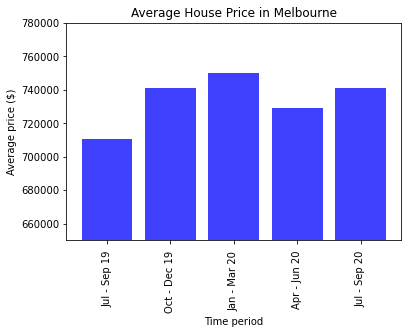

In [90]:
x_axis_data = stats_transposed["index"]
y_axis_data = stats_transposed[0]

x_axis = np.arange(0, len(x_axis_data))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average House Price in Melbourne")
plt.xlabel("Time period")
plt.ylabel("Average price ($)")
plt.ylim(ymax = 780000, ymin = 650000)

plt.bar(x_axis, y_axis_data, facecolor="blue", alpha=0.75, align="center")

plt.xticks(tick_locations, x_axis_data, rotation=90)

plt.show()